<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/master/Project%209/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


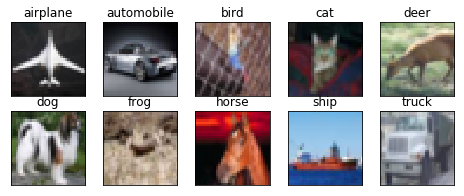

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Improved model from assignment 6A


In [8]:
# Define the model

dropout_rate = 0.15

model = Sequential()

# Convolution block
model.add(Convolution2D(128, (3, 3), input_shape=(32, 32, 3))) # RF: 3x3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Convolution2D(256, (3, 3))) # RF: 5x5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # RF: 10x10
model.add(Dropout(dropout_rate))
model.add(Convolution2D(64, (1, 1))) # RF: 10x10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Convolution block
model.add(Convolution2D(128, (3, 3))) # RF: 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Convolution2D(256, (3, 3))) # RF: 14x14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # RF: 28x28
model.add(Dropout(dropout_rate))
model.add(Convolution2D(128, (1, 1))) # RF: 28x28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(Convolution2D(256, (3, 3))) # RF: 30x30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Convolution2D(10, (3, 3))) #RF: 32x32

# Flattenign and output layer
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0818 12:21:29.225446 140363082884992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 12:21:29.264824 140363082884992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 12:21:29.271316 140363082884992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 12:21:29.313022 140363082884992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 12:21:29.314158 1403630828

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       295168    
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 256)       1024      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=40)`
W0818 12:21:33.541376 140363082884992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 40s 102ms/step - loss: 1.7487 - acc: 0.4464 - val_loss: 2.4290 - val_acc: 0.3328

Epoch 00001: val_acc improved from -inf to 0.33280, saving model to /content/gdrive/My Drive/Colab Notebooks/eva_9a_model_weights.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0029126214.
390/390 [==============================] - 34s 88ms/step - loss: 1.3356 - acc: 0.5720 - val_loss: 1.8866 - val_acc: 0.4495

Epoch 00002: val_acc improved from 0.33280 to 0.44950, saving model to /content/gdrive/My Drive/Colab Notebooks/eva_9a_model_weights.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0028301887.
390/390 [==============================] - 34s 88ms/step - loss: 0.9459 - acc: 0.6688 - val_loss: 1.1884 - val_acc: 0.6116

Epoch 00003: val_acc improved from 0.44950 to 0.61160, saving model to /content/gdrive/My Drive/Colab N

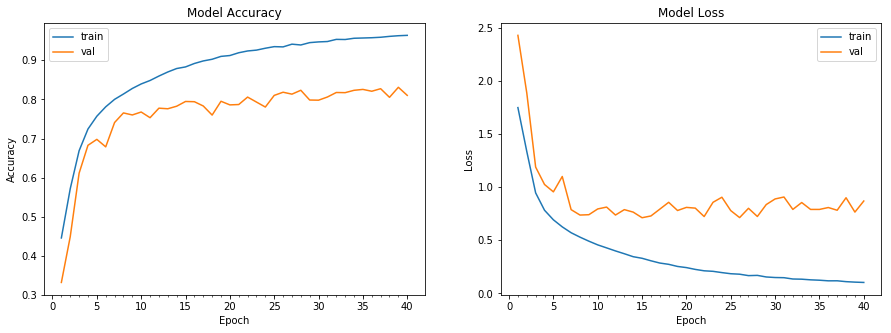

In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.03 * epoch), 10)

model_weights_filepath="/content/gdrive/My Drive/Colab Notebooks/eva_9a_model_weights.hdf5"
checkpoint = ModelCheckpoint(model_weights_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 40, 
                                 validation_data = (test_features, test_labels), callbacks = callbacks_list,
                                 verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

In [11]:
#Load the best model weights according to validation accuracy
model_weights_filepath="/content/gdrive/My Drive/Colab Notebooks/eva_9a_model_weights.hdf5"
model.load_weights(model_weights_filepath)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.08


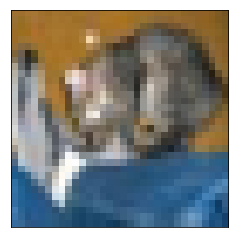

In [12]:
# Basic syntax to display an image 
fig, ax = plt.subplots(1,1)

ax.imshow( test_features[0] )
ax.set_xticks([],[])
ax.set_yticks([],[]);

In [13]:
test_features.shape[0]

10000

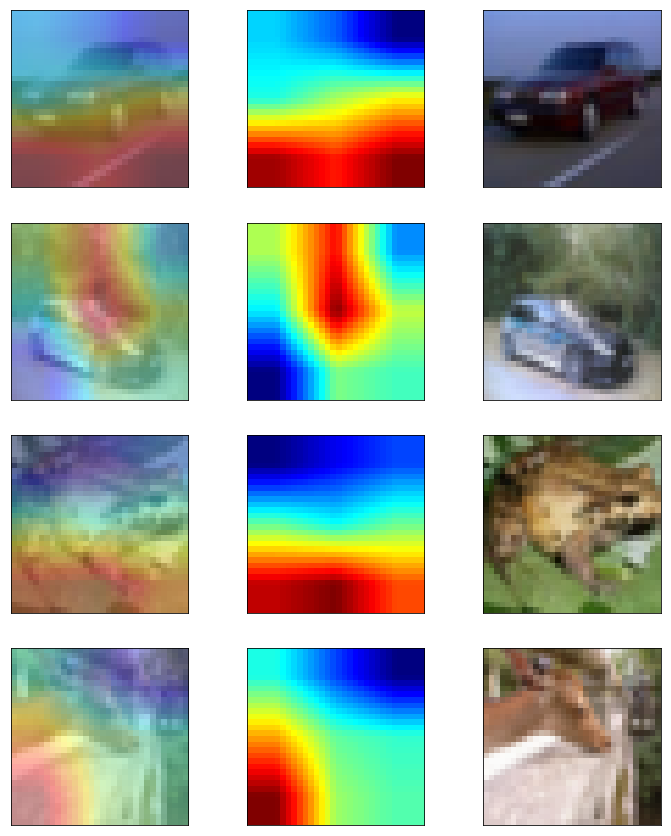

In [14]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow
import random


fig, ax = plt.subplots(4,3, figsize = (12,15))

target_image_idx = []
for i in range(4):    
    current_target_idx = random.randint(0,test_features.shape[0]-1)
    target_image_idx.append( current_target_idx )

    test_image = test_features[current_target_idx].reshape((1,32,32,3))

    preds = model.predict(test_image)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("conv2d_7")

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([test_image])
    for j in range(10):
        conv_layer_output_value[:, :, j] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = heatmap - np.amin( heatmap ) #Shifting the minimum to zero
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) # Scaling the maximum to one

    test_image = test_image.reshape( (32,32,3) )
    heatmap = cv2.resize(heatmap, (test_image.shape[1], test_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    
    ax[i][0].imshow(heatmap, alpha = 0.7)
    ax[i][0].imshow(test_image, alpha = 0.5)
    ax[i][0].set_xticks([],[])
    ax[i][0].set_yticks([],[]);

    ax[i][1].imshow(heatmap)
    ax[i][1].set_xticks([],[])
    ax[i][1].set_yticks([],[]);

    ax[i][2].imshow(test_image)
    ax[i][2].set_xticks([],[])
    ax[i][2].set_yticks([],[]);

Comments for each example:

1. The model seems to be primarily looking at the road on the bottom
2. The model is looking at the windshield of the car and a bit of the top
3. The model is looking at bottom green section of the image
4. The model is only looking at the bottom left section of the image. The head of the animal isnt focussed on by the model


Overall the model doesnt seem to focus on the key differentiating aspects of the image

Note: The way the GradCAM imagen is generated is slightly different here. All the activations were negative at the last convolution layer, hence instead of clipping the negative values I have shifted the values by the minimum gradient observed ( per example )

# Section 2

Implementing cutout

Using the implementation from https://github.com/yu4u/cutout-random-erasing

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
        if hasattr(layer, 'bias_initializer'):
            layer.bias.initializer.run(session=session)
            

reset_weights(model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=40)`


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 37s 95ms/step - loss: 1.4712 - acc: 0.4656 - val_loss: 2.2894 - val_acc: 0.3410

Epoch 00001: val_acc improved from -inf to 0.34100, saving model to /content/gdrive/My Drive/Colab Notebooks/eva_9b_model_weights.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0029126214.
390/390 [==============================] - 35s 89ms/step - loss: 1.0214 - acc: 0.6336 - val_loss: 1.0347 - val_acc: 0.6420

Epoch 00002: val_acc improved from 0.34100 to 0.64200, saving model to /content/gdrive/My Drive/Colab Notebooks/eva_9b_model_weights.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0028301887.
390/390 [==============================] - 35s 90ms/step - loss: 0.8504 - acc: 0.6994 - val_loss: 1.3322 - val_acc: 0.5325

Epoch 00003: val_acc did not improve from 0.64200
Epoch 4/40

Epoch 00004: LearningRateScheduler setting

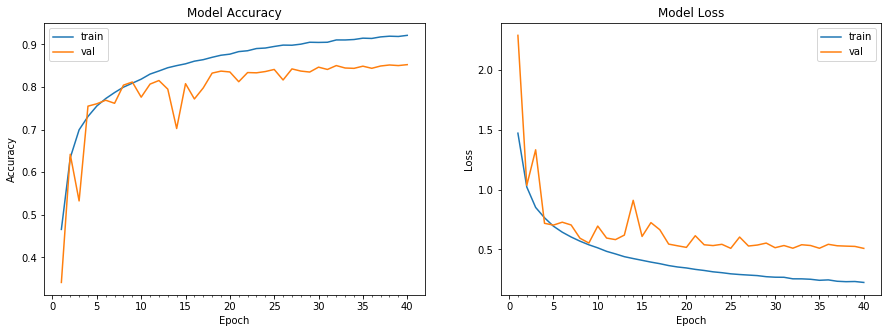

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))

from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.03 * epoch), 10)

model_with_cutout_weights_filepath="/content/gdrive/My Drive/Colab Notebooks/eva_9b_model_weights.hdf5"
checkpoint = ModelCheckpoint(model_with_cutout_weights_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]


# Re-Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 40, 
                                 validation_data = (test_features, test_labels), callbacks = callbacks_list,
                                 verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

In [18]:
#Load the best model weights according to validation accuracy
model_with_cutout_weights_filepath="/content/gdrive/My Drive/Colab Notebooks/eva_9b_model_weights.hdf5"
model.load_weights(model_with_cutout_weights_filepath)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 85.26


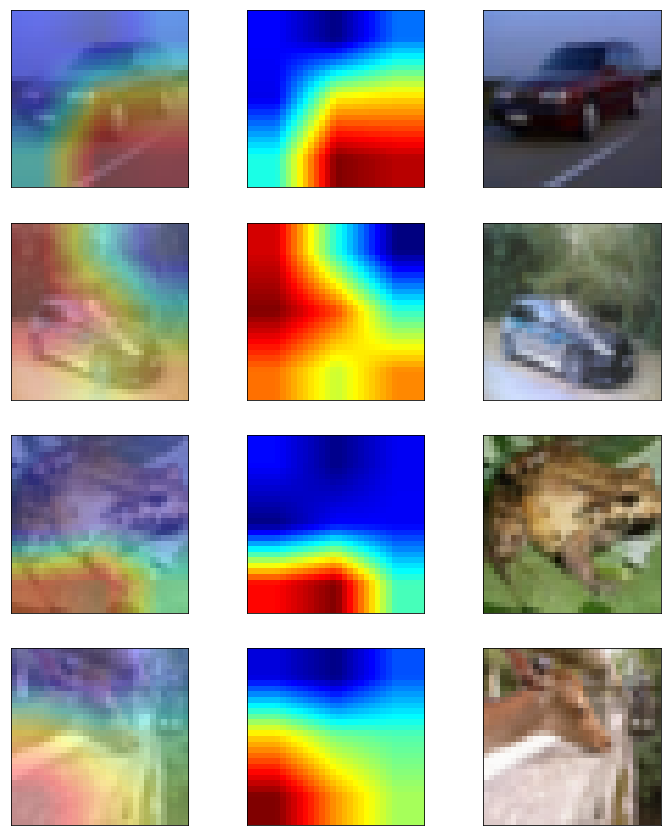

In [19]:
fig, ax = plt.subplots(4,3, figsize = (12,15))

for i in range(4):    
    current_target_idx = target_image_idx[i]

    test_image = test_features[current_target_idx].reshape((1,32,32,3))

    preds = model.predict(test_image)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("conv2d_7")

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([test_image])
    for j in range(10):
        conv_layer_output_value[:, :, j] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = heatmap - np.amin( heatmap )
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    test_image = test_image.reshape( (32,32,3) )
    heatmap = cv2.resize(heatmap, (test_image.shape[1], test_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    
    ax[i][0].imshow(heatmap, alpha = 0.7)
    ax[i][0].imshow(test_image, alpha = 0.5)
    ax[i][0].set_xticks([],[])
    ax[i][0].set_yticks([],[]);

    ax[i][1].imshow(heatmap)
    ax[i][1].set_xticks([],[])
    ax[i][1].set_yticks([],[]);

    ax[i][2].imshow(test_image)
    ax[i][2].set_xticks([],[])
    ax[i][2].set_yticks([],[]);

Comments on each example:

1. The model is still focussing largely on the road on the bottom. However slightly more of the car is in focus now than earlier
2. The rear of the car is now in focus and slightly more of the background.
3. The model is now focussing more on the bottom green section ( This example is counter to what we are trying to achieve through cutout and raises potential issues with the method. That said that negative gradients are not clipped in this implementation of GradCAM might also be the cause for such observations )
4. The model is still focussing outside the animal

Overall comments:

Seeing the few examples we have taken the model seems to have improved in some places and worsened in some. The validation accuracy has improved significantly though. Hence its possible that the examples we have picked dont show cutout in the best light but it has indeed made the model better and more robust.